In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.spatial.distance import mahalanobis

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62    0.0  
1  0.125895 -0.008983  0.014724    2.69    0.0  
2 -0.139097 -0.055353 -0.059752  378.66    0.0  
3 -0.221929  0.062723  0.061458  123.50    0.0  
4  0.502292  0.219422  0.215153   69.99    0.0  

[5 rows x 31 columns]

In [ ]:
df.describe()

Time             V1             V2             V3  \
count  158602.000000  158602.000000  158602.000000  158602.000000   
mean    56792.765224      -0.217899       0.051077       0.583491   
std     24015.215614       1.844292       1.619322       1.347026   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     39913.000000      -1.010306      -0.531009       0.063091   
50%     57959.000000      -0.245020       0.122910       0.687996   
75%     75273.750000       1.170099       0.811678       1.333499   
max    111502.000000       2.439207      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  158602.000000  158602.000000  158602.000000  158602.000000   
mean        0.140002      -0.217716       0.068351      -0.099201   
std         1.360643       1.332748       1.290818       1.213388   
min        -5.519697     -42.147898     -26.160506     -43.557242   
25%        -0.716864      -0.857726      -0.677994      -0.596178   
50%         0.152169      -0.262104      -0.190095      -0.045868   
75%         0.966667       0.318932       0.455709       0.442822   
max        16.875344      34.801666      22.529298      36.677268   

                  V8             V9  ...            V21            V22  \
count  158601.000000  158601.000000  ...  158601.000000  158601.000000   
mean        0.043361       0.018907  ...      -0.037993      -0.105827   
std         1.243893       1.163562  ...       0.748017       0.651720   
min       -73.216718     -13.434066  ...     -34.830382     -10.933144   
25%        -0.151309      -0.666483  ...      -0.232265      -0.550806   
50%         0.066493      -0.088558  ...      -0.060640      -0.083086   
75%         0.361723       0.648337  ...       0.114545       0.328623   
max        20.007208      15.594995  ...      27.202839      10.503090   

                 V23            V24            V25            V26  \
count  158601.000000  158601.000000  158601.000000  158601.000000   
mean       -0.026556       0.008720       0.107841       0.016423   
std         0.587888       0.596342       0.454389       0.493505   
min       -44.807735      -2.836627     -10.295397      -2.604551   
25%        -0.171517      -0.329623      -0.170885      -0.329231   
50%        -0.040527       0.061612       0.149898      -0.058870   
75%         0.092086       0.411505       0.408188       0.282505   
max        19.002942       4.022866       7.519589       3.517346   

                 V27            V28         Amount          Class  
count  158601.000000  158601.000000  158601.000000  158601.000000  
mean        0.001441       0.002376      87.748041       0.002245  
std         0.393423       0.311145     245.825803       0.047324  
min       -22.565679     -11.710896       0.000000       0.000000  
25%        -0.064459      -0.014273       5.580000       0.000000  
50%         0.010032       0.022315      21.960000       0.000000  
75%         0.089498       0.078029      77.400000       0.000000  
max        12.152401      33.847808   19656.530000       1.000000  

[8 rows x 31 columns]

In [ ]:
print(df.shape)
data= df.sample(frac = 0.2,random_state=1)
print(data.shape)

(158602, 31)
(31720, 31)


In [ ]:
df.isnull().values.any()

True

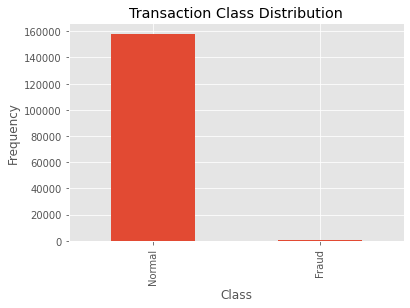

In [ ]:
num_classes = pd.value_counts(df['Class'], sort = True)
num_classes.plot(kind = 'bar')
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

print(fraud.shape, normal.shape)

(356, 31) (158245, 31)


In [ ]:
fraud.describe()

Time          V1          V2          V3          V4  \
count     356.000000  356.000000  356.000000  356.000000  356.000000   
mean    55968.873596   -6.057284    4.419181   -8.006879    4.902106   
std     29532.259316    7.441887    4.561041    8.048408    2.991285   
min       406.000000  -30.552380   -6.976420  -31.103685   -1.313275   
25%     34454.750000   -8.821900    1.354905  -12.434417    2.666782   
50%     55062.500000   -3.217167    3.260330   -5.347642    4.430873   
75%     84204.000000   -1.090946    6.584283   -1.873868    6.676565   
max    110617.000000    1.954852   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9  ...  \
count  356.000000  356.000000  356.000000  356.000000  356.000000  ...   
mean    -4.402531   -1.445960   -7.057336    0.778068   -2.884994  ...   
std      5.713243    2.016276    7.878303    7.887796    2.740212  ...   
min    -22.105532   -5.430971  -43.557242  -41.044261  -13.434066  ...   
25%     -7.191694   -2.747286  -11.568162   -0.126436   -4.364509  ...   
50%     -2.512902   -1.517779   -4.358738    0.772544   -2.484724  ...   
75%     -0.525436   -0.368073   -1.541741    2.759181   -0.778617  ...   
max     11.095089    6.474115    5.802537   20.007208    3.353525  ...   

              V21         V22         V23         V24         V25         V26  \
count  356.000000  356.000000  356.000000  356.000000  356.000000  356.000000   
mean     0.767732   -0.017997   -0.045050   -0.073773    0.080805    0.036841   
std      4.473707    1.679734    1.776062    0.488421    0.853182    0.449419   
min    -22.797604   -8.887017  -19.254328   -1.632653   -4.781606   -1.123534   
25%     -0.010842   -0.542923   -0.402901   -0.405859   -0.300566   -0.264031   
50%      0.673552    0.060848   -0.104526   -0.024949    0.121059   -0.033472   
75%      1.699745    0.554812    0.335992    0.311096    0.528483    0.373307   
max     27.202839    8.361985    5.466230    1.091435    2.208209    1.246604   

              V27         V28       Amount  Class  
count  356.000000  356.000000   356.000000  356.0  
mean     0.181541    0.044143   112.005000    1.0  
std      1.541845    0.583518   228.517058    0.0  
min     -7.263482   -1.869290     0.000000    1.0  
25%     -0.042111   -0.179143     1.000000    1.0  
50%      0.418542    0.147631     9.905000    1.0  
75%      1.148344    0.388215   102.125000    1.0  
max      3.052358    1.779364  1809.680000    1.0  

[8 rows x 31 columns]

In [ ]:
normal.describe()

Time             V1             V2             V3  \
count  158245.000000  158245.000000  158245.000000  158245.000000   
mean    56794.272988      -0.204776       0.041254       0.602823   
std     24001.139164       1.791070       1.593245       1.227542   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     39917.000000      -1.006295      -0.532161       0.068090   
50%     57966.000000      -0.241237       0.120791       0.690618   
75%     75264.000000       1.170506       0.806789       1.335226   
max    111500.000000       2.439207      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  158245.000000  158245.000000  158245.000000  158245.000000   
mean        0.129288      -0.208300       0.071758      -0.083543   
std         1.335785       1.291321       1.286732       1.107801   
min        -5.519697     -42.147898     -26.160506     -31.764946   
25%        -0.718286      -0.854594      -0.675792      -0.593147   
50%         0.148605      -0.260572      -0.188789      -0.044567   
75%         0.960491       0.319258       0.456903       0.443835   
max        16.875344      34.801666      22.529298      36.677268   

                  V8             V9  ...            V21            V22  \
count  158245.000000  158245.000000  ...  158245.000000  158245.000000   
mean        0.041708       0.025439  ...      -0.039806      -0.106025   
std         1.187416       1.149376  ...       0.717235       0.647570   
min       -73.216718      -6.290730  ...     -34.830382     -10.933144   
25%        -0.151317      -0.663196  ...      -0.232347      -0.550834   
50%         0.066156      -0.086353  ...      -0.060990      -0.083358   
75%         0.360015       0.650706  ...       0.113660       0.328070   
max        18.709255      15.594995  ...      22.614889      10.503090   

                 V23            V24            V25            V26  \
count  158245.000000  158245.000000  158245.000000  158245.000000   
mean       -0.026515       0.008905       0.107902       0.016377   
std         0.582505       0.596551       0.453100       0.493600   
min       -44.807735      -2.836627     -10.295397      -2.604551   
25%        -0.171257      -0.329291      -0.170655      -0.329341   
50%        -0.040503       0.061673       0.149955      -0.058894   
75%         0.091903       0.411676       0.408043       0.282244   
max        19.002942       4.022866       7.519589       3.517346   

                 V27            V28         Amount     Class  
count  158245.000000  158245.000000  158245.000000  158245.0  
mean        0.001036       0.002282      87.693471       0.0  
std         0.386942       0.310260     245.861341       0.0  
min       -22.565679     -11.710896       0.000000       0.0  
25%        -0.064468      -0.014224       5.650000       0.0  
50%         0.009910       0.022284      21.970000       0.0  
75%         0.089051       0.077676      77.190000       0.0  
max        12.152401      33.847808   19656.530000       0.0  

[8 rows x 31 columns]

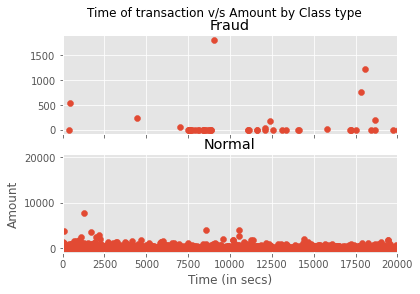

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction v/s Amount by Class type')
bins = 10
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in secs)')
plt.ylabel('Amount')
plt.xlim((0, 20000))

plt.show()

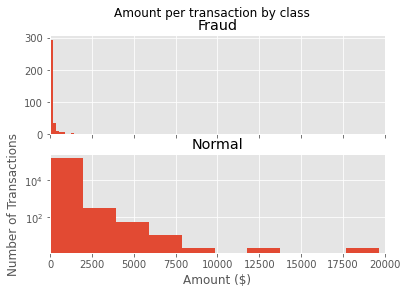

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 10
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')

plt.show()

In [ ]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]
outlier_fraction = len(fraud)/float(len(normal))

anomaly_fraction = len(fraud)/float(len(normal))
print(anomaly_fraction)

print("Fraud Cases: " + str(len(fraud)))
print("Normal Cases: " + str(len(normal)))

0.00230676862794666
Fraud Cases: 73
Normal Cases: 31646


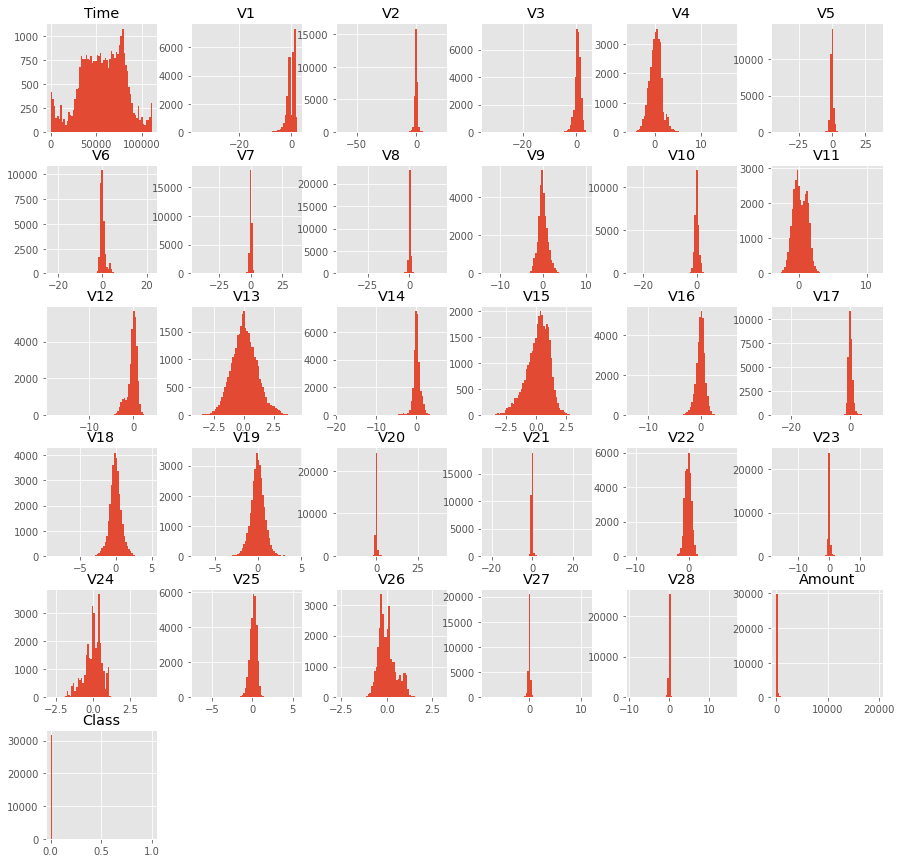

In [ ]:
data.hist(figsize=(15,15), bins = 64)
plt.show()

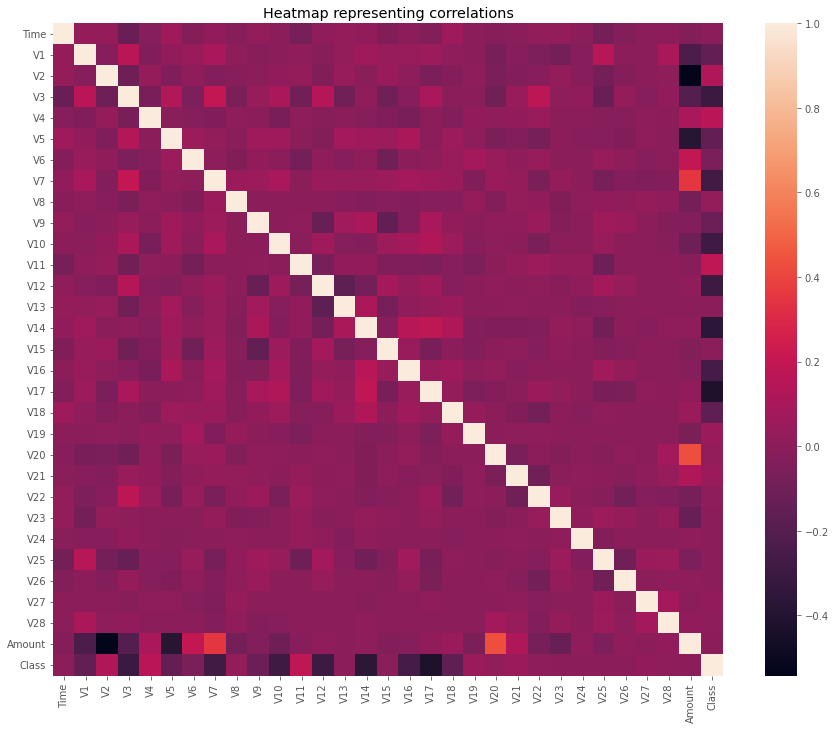

In [ ]:
import seaborn as sns
plt.figure(figsize = (15, 12))
df_correlation = df.corr()
sns.heatmap(df_correlation)

plt.title("Heatmap representing correlations")
plt.show()

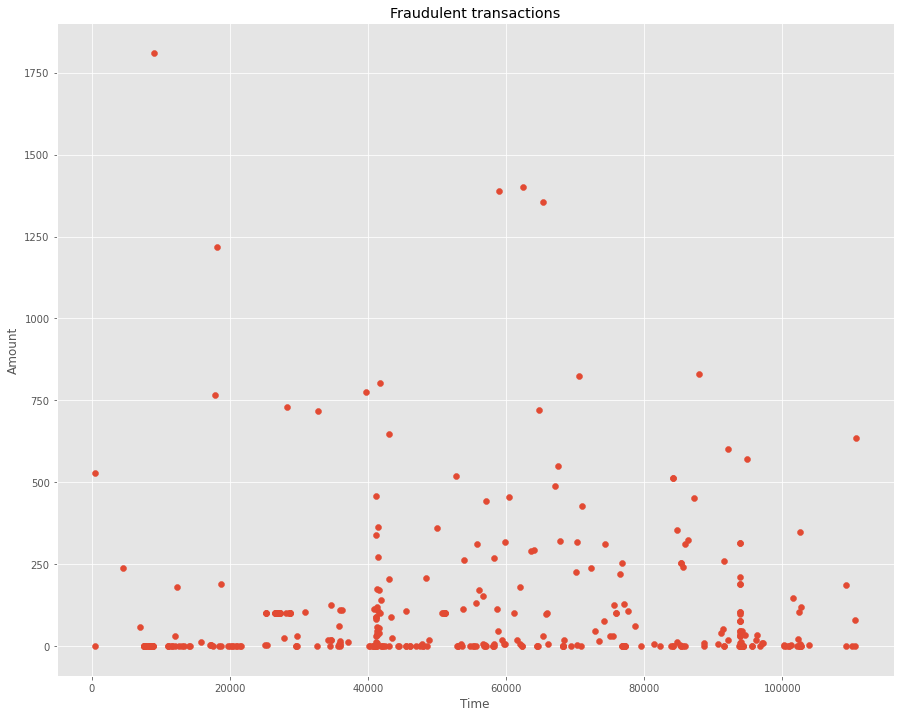

In [ ]:
df_fraud = df[df['Class'] == 1]
plt.figure(figsize=(15, 12))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title("Fraudulent transactions")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

In [ ]:
df_train = df[:150000]
df_train_fraud = df_train[df_train['Class'] == 1]
df_train_not_fraud = df_train[df_train['Class'] == 0]

print(df_train_fraud.shape[0])

293


In [ ]:
df_sample = df_train_not_fraud.sample(300)
df_train_final = df_train_fraud.append(df_sample)
df_train_final = df_train_final.sample(frac = 1).reset_index(drop = True)
df_train_final.head()

Time         V1         V2        V3        V4        V5        V6  \
0  40358.0 -13.994721 -19.730311 -2.123549  3.419792  7.936157 -7.494736   
1  45541.0  -1.519244   2.308492 -1.503599  2.064101 -1.000845 -1.016897   
2  91502.0   0.007379   2.365183 -2.600287  1.111602  3.276441 -1.776141   
3  84204.0  -0.937843   3.462889 -6.445104  4.932199 -2.233983 -2.291561   
4  68207.0 -13.192671  12.785971 -9.906650  3.320337 -4.801176  5.760059   

          V7         V8        V9  ...        V21       V22       V23  \
0  -4.853774   1.181704 -0.672451  ...   2.371271 -0.844909  2.056230   
1  -2.059731  -0.275166 -1.562206  ...   1.307871  0.102826 -0.017746   
2   2.114531  -0.830084  0.900490  ...  -0.563944 -0.902100 -0.404382   
3  -5.695594   1.338825 -4.322377  ...   1.066550 -0.521657 -0.319917   
4 -18.750889 -37.353443 -0.391540  ...  27.202839 -8.887017  5.303607   

        V24       V25       V26       V27       V28  Amount  Class  
0  0.038706 -0.040628 -0.523827  0.209316 -2.347979  1000.0    0.0  
1  0.149696 -0.096602 -0.369115 -0.019244 -0.208319     1.0    1.0  
2 -0.012944  0.589836 -0.734449 -0.447529 -0.362375     1.0    1.0  
3 -0.405859  0.906802  1.165784  1.374495  0.729889     0.0    1.0  
4 -0.639435  0.263203 -0.108877  1.269566  0.939407     1.0    1.0  

[5 rows x 31 columns]

In [ ]:
X_train = df_train_final.drop(['Time', 'Class'],axis=1)
y_train = df_train_final['Class']

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
df_test = df[150000:]

X_test = df_test.drop(['Time', 'Class'],axis=1)
y_test = df_test['Class']
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
print(df_test['Class'].value_counts())

0.0    8538
1.0      63
Name: Class, dtype: int64


In [ ]:
# Applying SVM
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [ ]:
W_Data=pd.read_csv("/content/creditcard.csv")
W_Data.dropna(thresh=284315)
Data=W_Data[1:50000]

In [ ]:
Negatives=W_Data[W_Data['Class']==0]
Positives=W_Data[W_Data['Class']==1]

In [ ]:
#RBF Kernel
from sklearn import svm
clf_AD = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf_AD.fit(Negatives)

In [ ]:
#Linear Kernel
clf_AD_L = svm.OneClassSVM(nu=0.1, kernel="linear", gamma=0.1)
clf_AD_L.fit(Negatives)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
W_Data=pd.read_csv("/content/creditcard.csv")
W_Data.dropna(thresh=284315)
Data=W_Data

In [ ]:
Data.sample(frac=0.1).head(n=5)

Time        V1        V2        V3        V4        V5        V6  \
31281    36301.0  1.121257 -0.038477 -0.661396  0.644742  1.435686  2.459248   
267540  162815.0 -1.062481 -0.555016  0.508374 -2.191400 -1.339657 -0.782236   
249633  154506.0 -1.810863  0.293653 -1.754921  0.253659  3.563317  3.588929   
169635  119788.0 -1.511934  0.362749  1.254482  1.112060 -0.095328  0.391511   
191795  129411.0  1.943221 -0.491910 -1.162209  0.107587 -0.202759 -0.492053   

              V7        V8        V9  ...       V21       V22       V23  \
31281  -0.227872  0.681127  0.061573  ...  0.013082  0.258937 -0.237068   
267540  0.471824  0.061384 -2.995789  ...  0.266135  0.616142 -0.012973   
249633  1.396877  0.589445 -0.969364  ... -0.122528 -0.033211 -0.335404   
169635 -0.715971  0.487586  0.144217  ...  0.240562  0.690875 -0.602560   
191795 -0.126611 -0.024413  1.034277  ... -0.122115 -0.256707  0.152237   

             V24       V25       V26       V27       V28  Amount  Class  
31281  -2.761047  0.685645 -0.039159  0.066432 -0.030205    8.51      0  
267540  0.052553  0.921561  0.274726 -0.161649 -0.029964  216.00      0  
249633  0.609930  1.200755 -0.237196 -0.588890 -0.334583  172.91      0  
169635  0.560982  0.337616  0.301424 -0.353392  0.063103    9.99      0  
191795 -0.412176 -0.120048 -0.082489 -0.040134 -0.066215   40.78      0  

[5 rows x 31 columns]

In [ ]:
Data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [ ]:
Positives=W_Data[W_Data['Class']==1]
Negatives=W_Data[W_Data['Class']==0]

In [ ]:
print((len(Positives)/len(W_Data))*100,"%")

0.1727485630620034 %


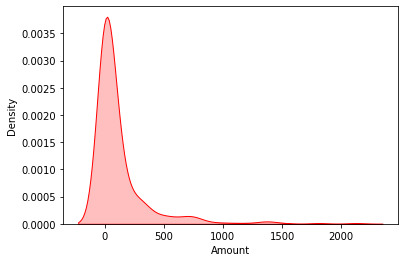

In [ ]:
sns.kdeplot(Positives['Amount'],shade=True,color="red")

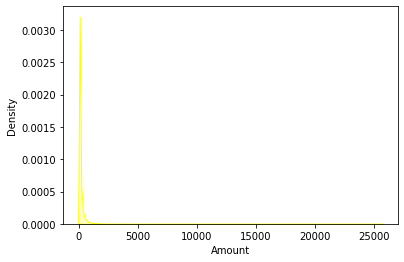

In [ ]:
sns.kdeplot(Negatives['Amount'],shade=True,color="yellow")

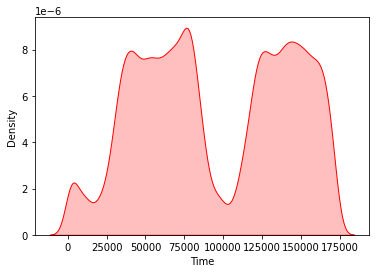

In [ ]:
sns.kdeplot(Negatives['Time'],shade=True,color="red")

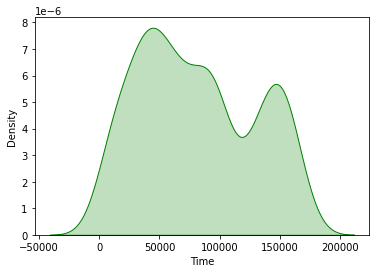

In [ ]:
sns.kdeplot(Positives['Time'],shade=True,color="green")

In [ ]:
Negatives=Data[Data['Class']==0]
Positives=Data[Data['Class']==1]

In [ ]:
Train_Data=Data[1:50000]
Target=Train_Data['Class']
Train_Data.drop('Class',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(Train_Data,Target,test_size=0.5,random_state=0)

In [ ]:
clf_l=svm.SVC(kernel='linear')
clf_l.fit(x_train,y_train)
print(classification_report(y_test,clf_l.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24931
           1       0.64      0.67      0.65        69

    accuracy                           1.00     25000
   macro avg       0.82      0.83      0.83     25000
weighted avg       1.00      1.00      1.00     25000



In [ ]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [ ]:
W_Data=pd.read_csv("/content/creditcard.csv")
W_Data.dropna(thresh=284315)
Data=W_Data[1:50000]

In [ ]:
Negatives=Data[Data['Class']==0]
Positives=Data[Data['Class']==1]

In [ ]:
#RBF Kernel
from sklearn import svm
clf_AD = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf_AD.fit(Negatives)

In [ ]:
#Linear Kernel
clf_AD_L = svm.OneClassSVM(nu=0.1, kernel="linear", gamma=0.1)
clf_AD_L.fit(Negatives)